<a href="https://colab.research.google.com/github/Aliviarahma/House-Price-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import urllib.request

drive_url = 'https://drive.google.com/drive/u/0/folders/1kX-uiFIUP2fHMkZNuIgFgwokhLDsNENt'
file_name = 'Housing_Price_Data.zip'
urllib.request.urlretrieve(drive_url, file_name)
drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dataset/Housing_Price_Data.zip", 'r')
zip_ref.extractall("data/")
zip_ref.close()
print('Import Data completed!')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Import Data completed!


##2. Import Package

In [ ]:
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##3. Loading Data

In [ ]:
data = pd.read_csv("/content/data/Housing_Price_Data.csv")
print(data.shape)
data.head()

(545, 13)


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
data.shape

(545, 13)

##4. Data Preprocessing

###4.1 EDA

In [ ]:
# Investigate all the elements whithin each Feature

for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature price :219
The number of values for feature area :284
The number of values for feature bedrooms :6 -- [1 2 3 4 5 6]
The number of values for feature bathrooms :4 -- [1 2 3 4]
The number of values for feature stories :4 -- [1 2 3 4]
The number of values for feature mainroad :2 -- ['no' 'yes']
The number of values for feature guestroom :2 -- ['no' 'yes']
The number of values for feature basement :2 -- ['no' 'yes']
The number of values for feature hotwaterheating :2 -- ['no' 'yes']
The number of values for feature airconditioning :2 -- ['no' 'yes']
The number of values for feature parking :4 -- [0 1 2 3]
The number of values for feature prefarea :2 -- ['no' 'yes']
The number of values for feature furnishingstatus :3 -- ['furnished' 'semi-furnished' 'unfurnished']


###4.2 Checking for NULL values

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

###4.3  Investigating the numeric values with scatterplots

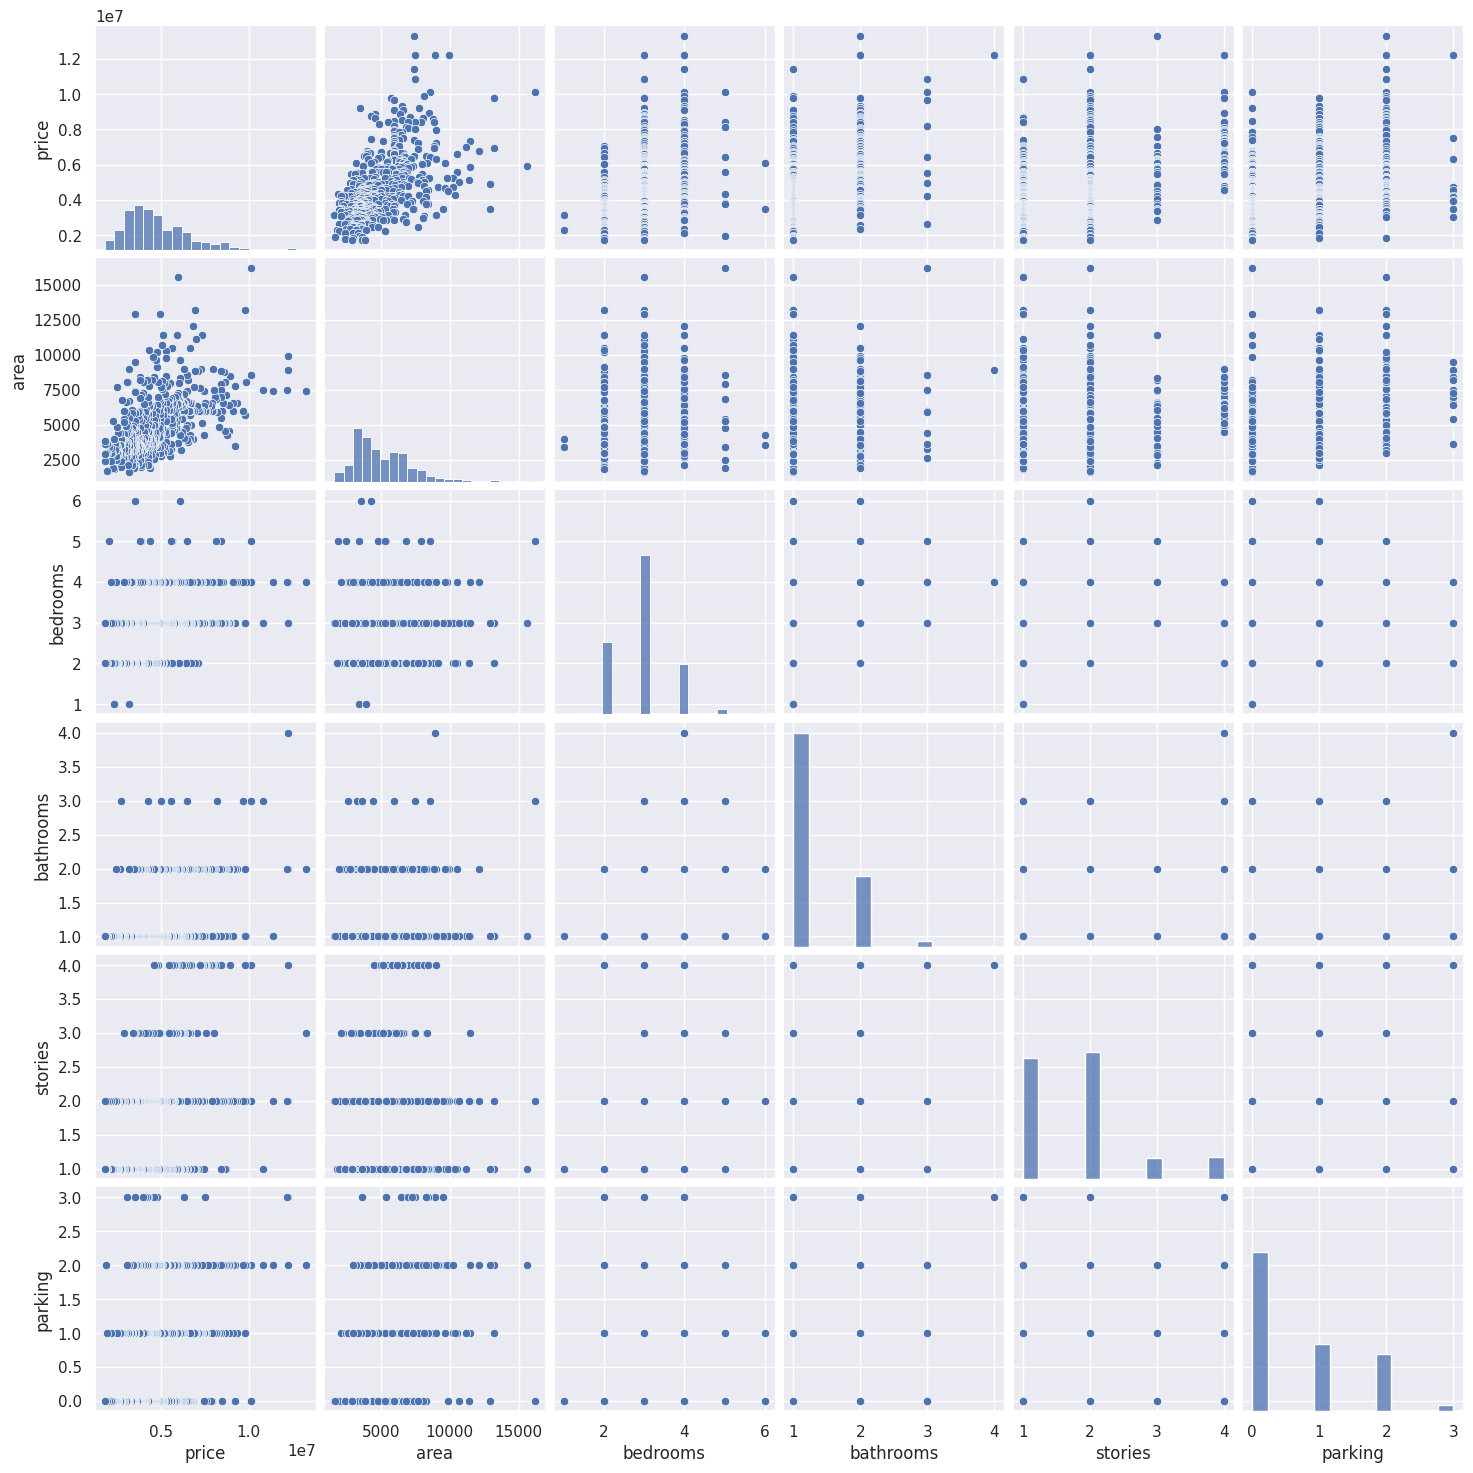

In [ ]:
# Example 1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(data)

# Notes: Do not run this on a big dataset. Filter the columns first

In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

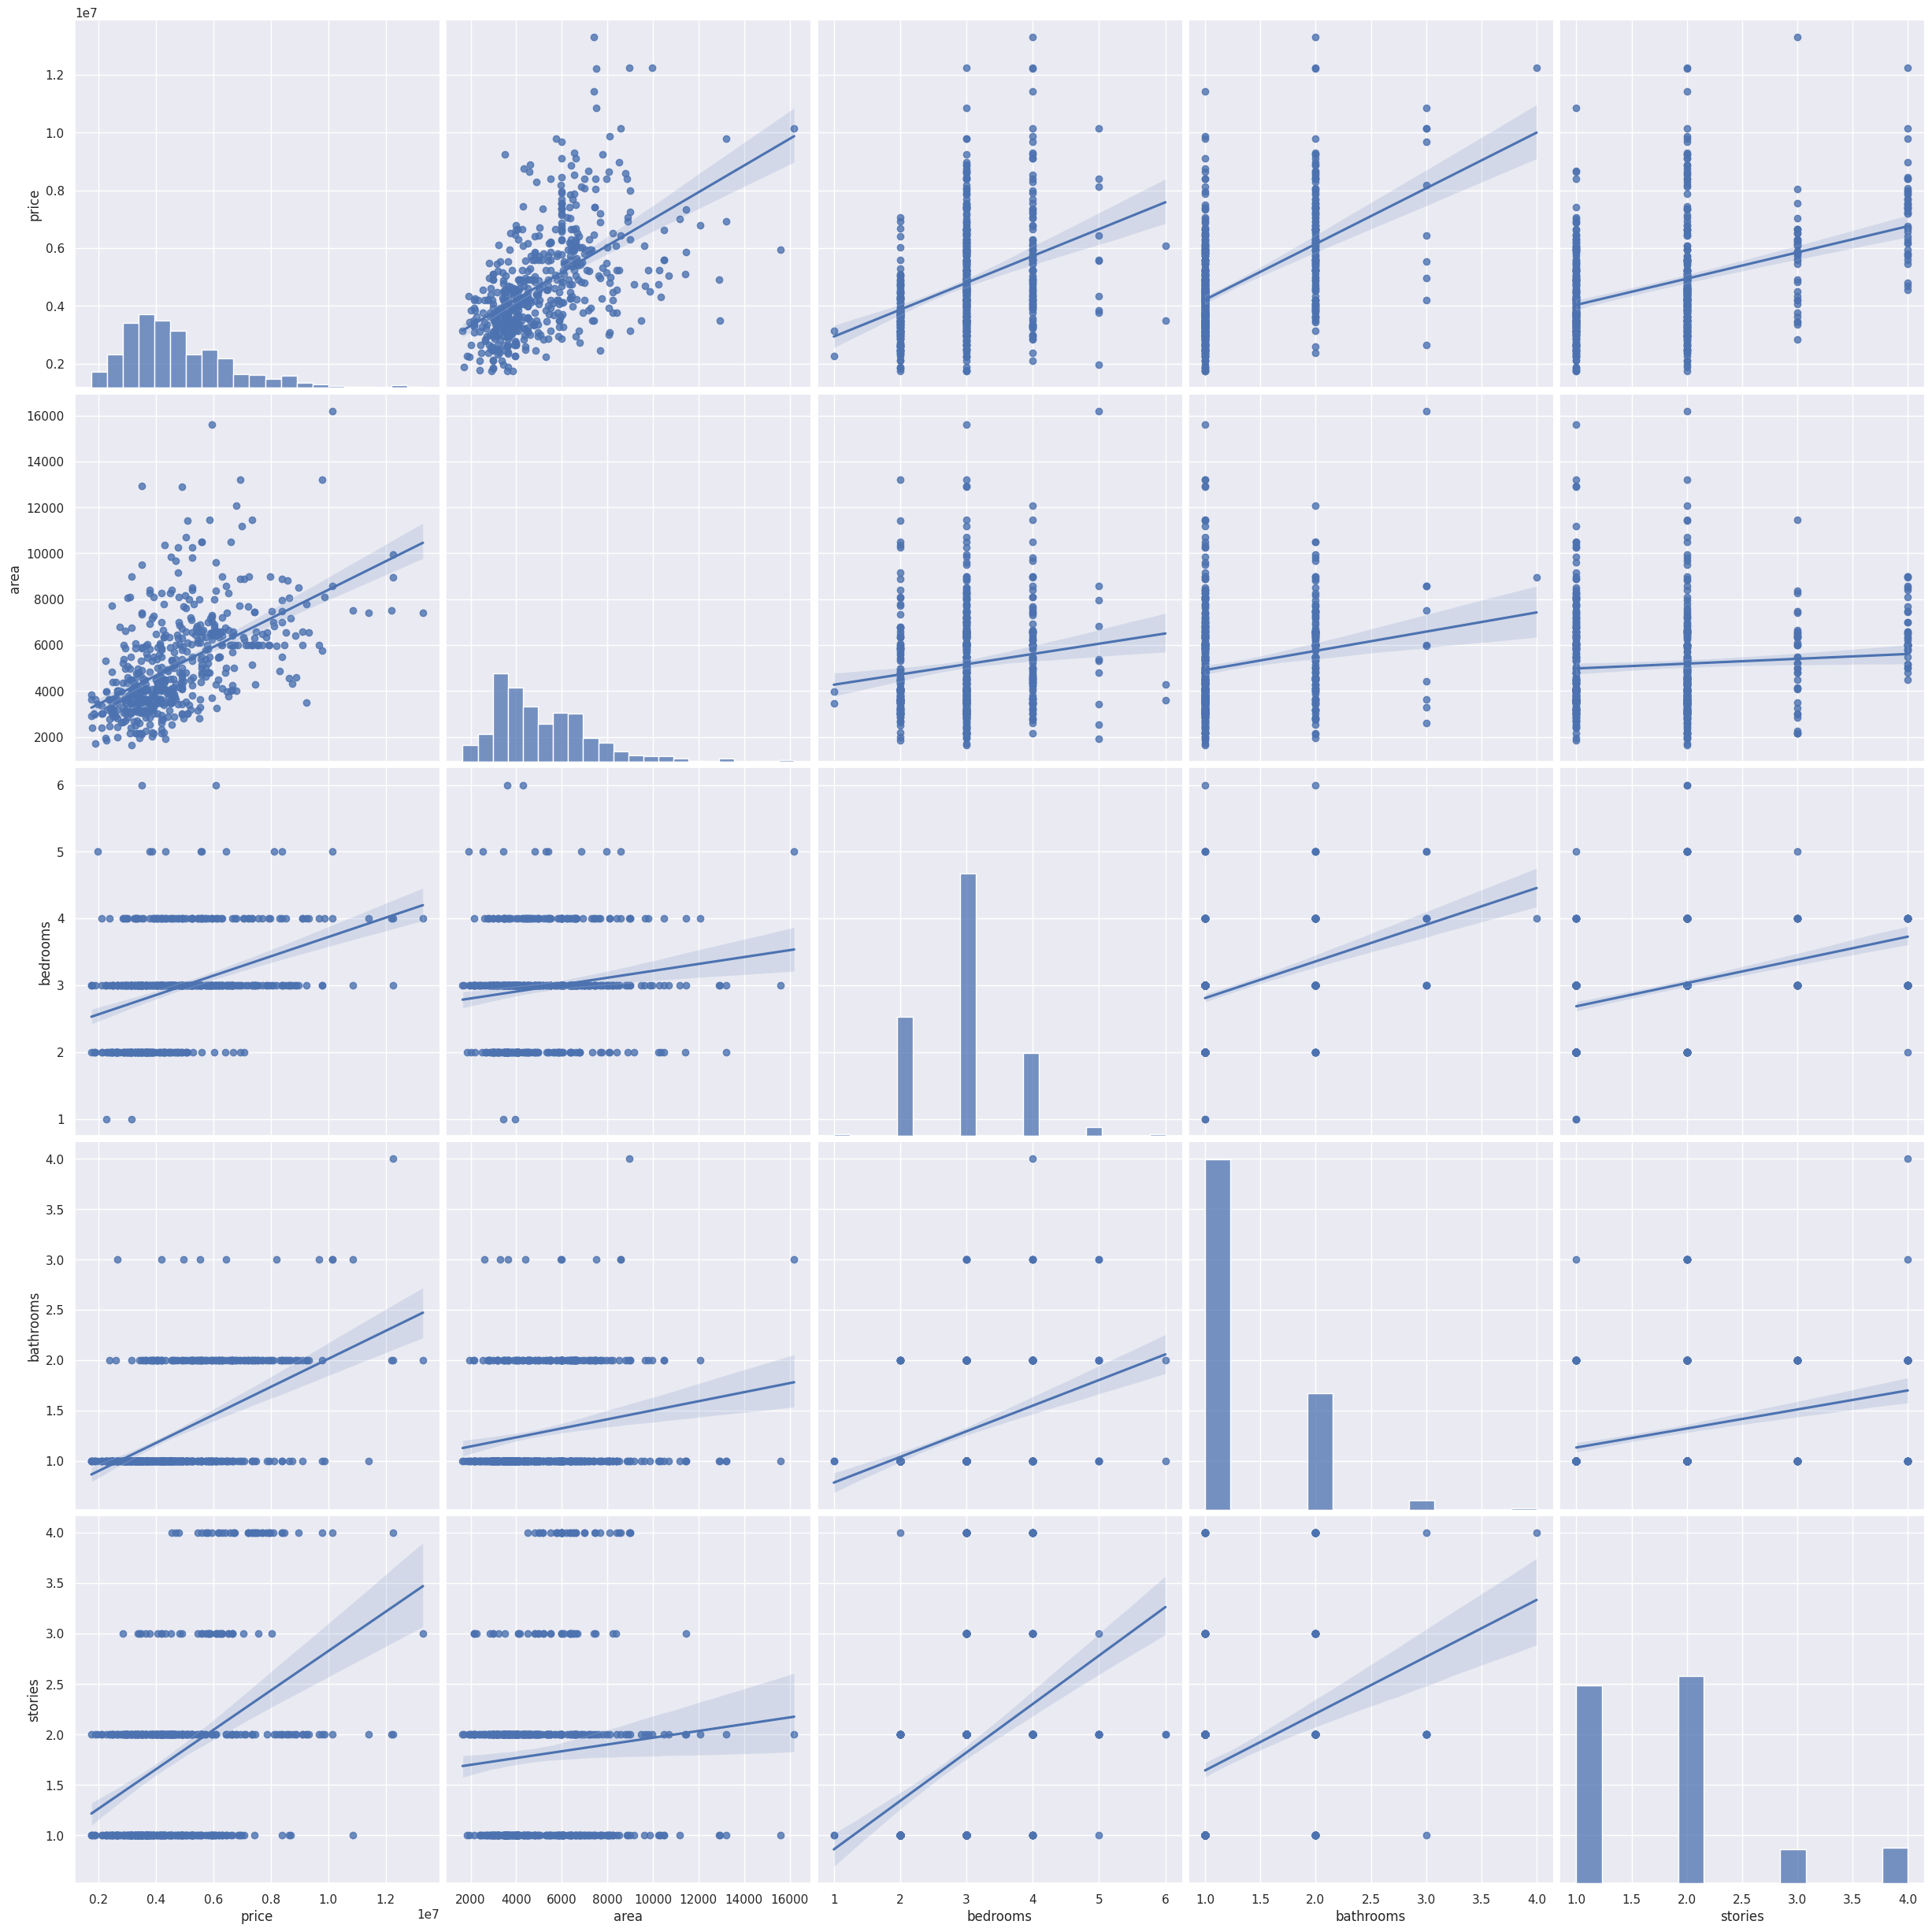

In [ ]:
# Example 3 - Visualising a Subset of our data - important features

g = sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories']], height = 5, kind="reg")

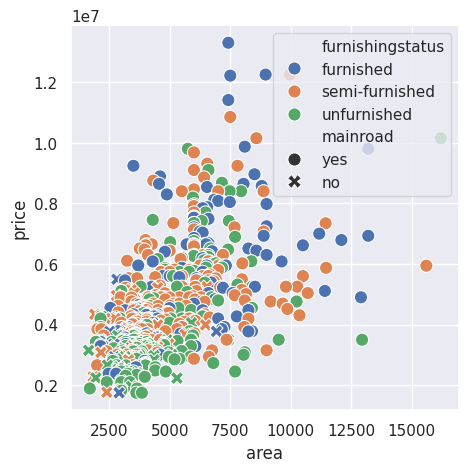

In [ ]:
# Example 4 - Relationship between price and horsepower by carbody

ax = sns.scatterplot(x="area", y="price", data=data, hue = 'furnishingstatus', style = 'mainroad', s=90)

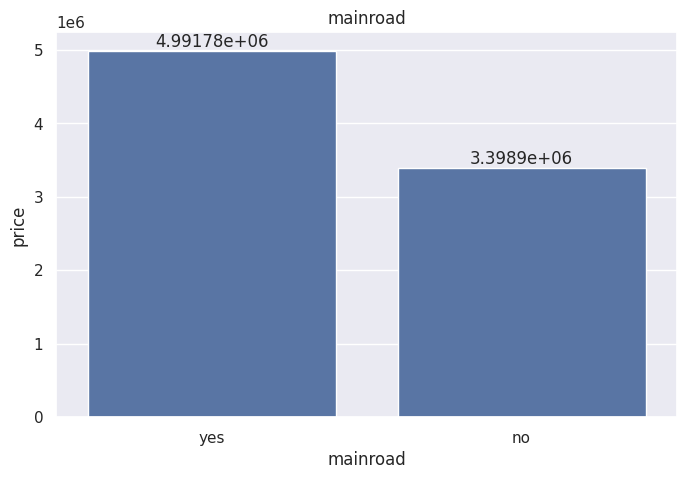

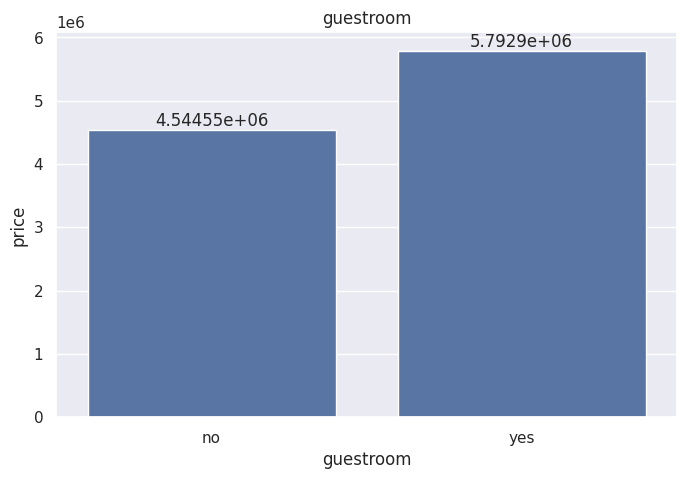

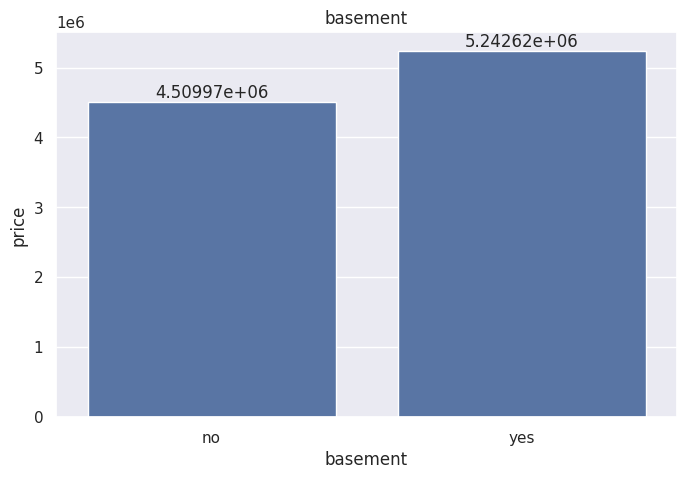

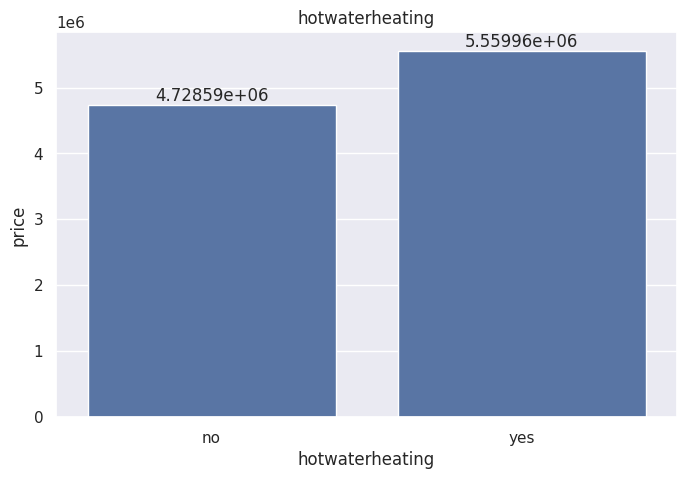

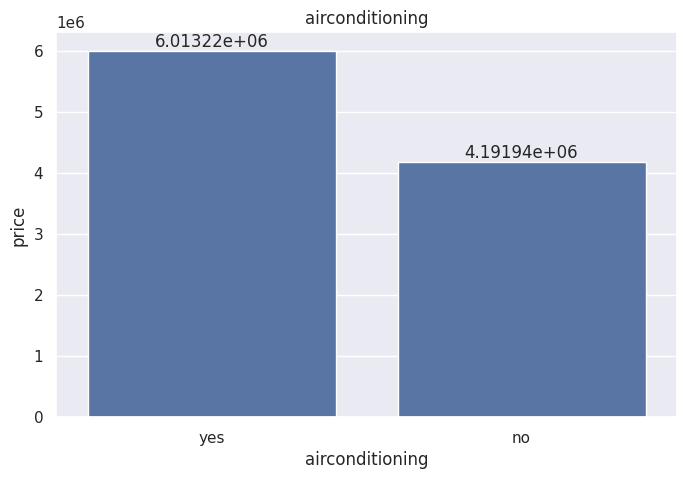

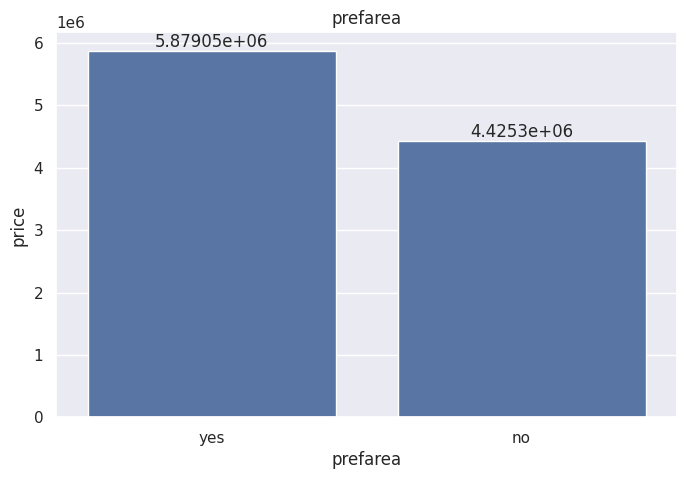

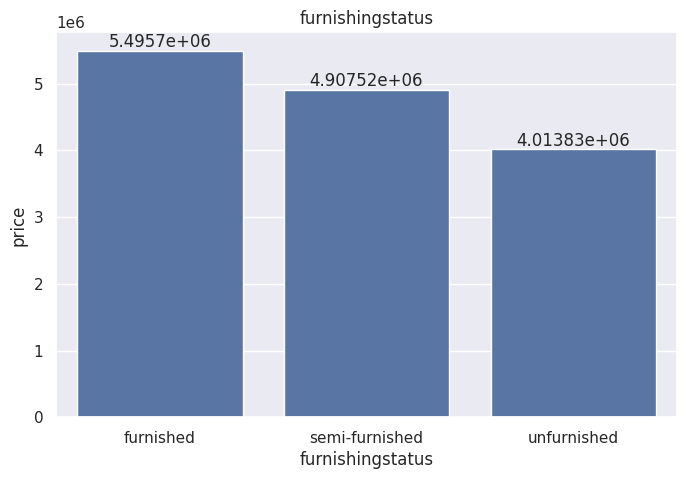

In [ ]:
# Example 6 - Total price by carbody for multible categories

categories = ['mainroad', 'guestroom', 'basement',	'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:

    ax = sns.barplot(x=c, y="price", data=data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

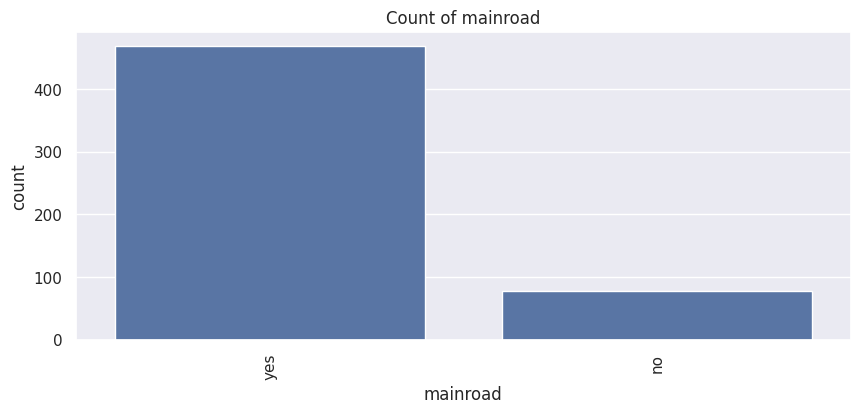

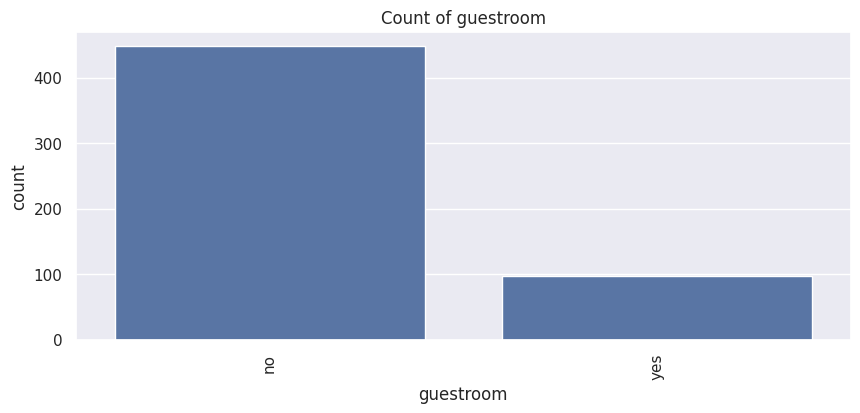

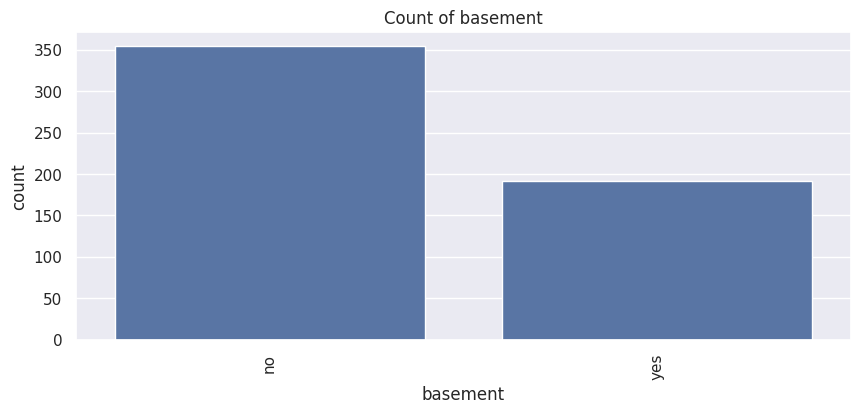

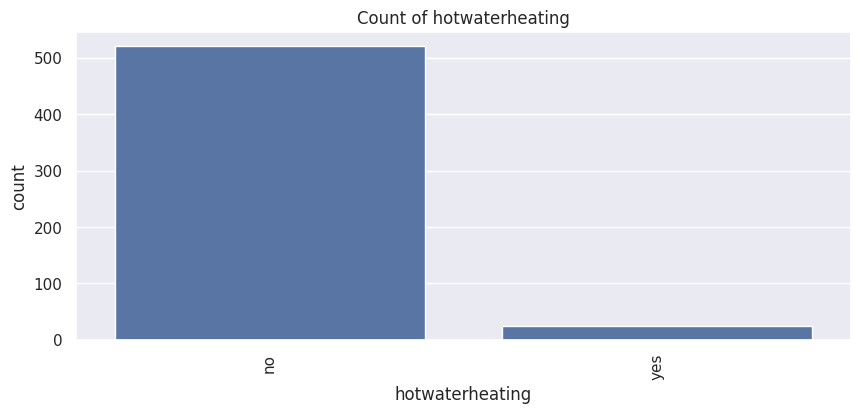

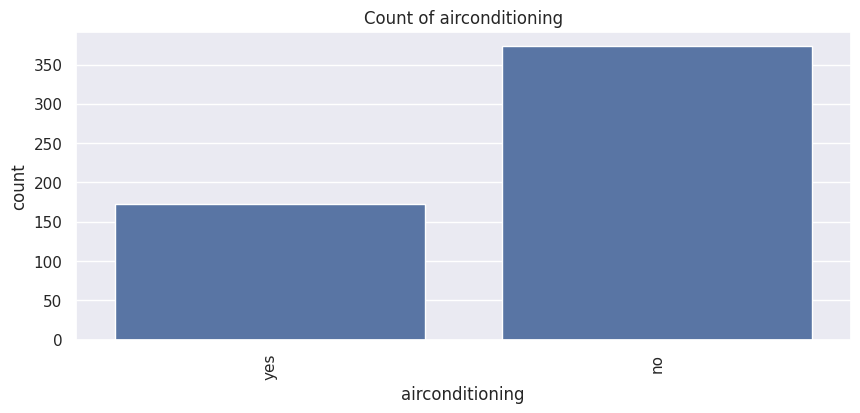

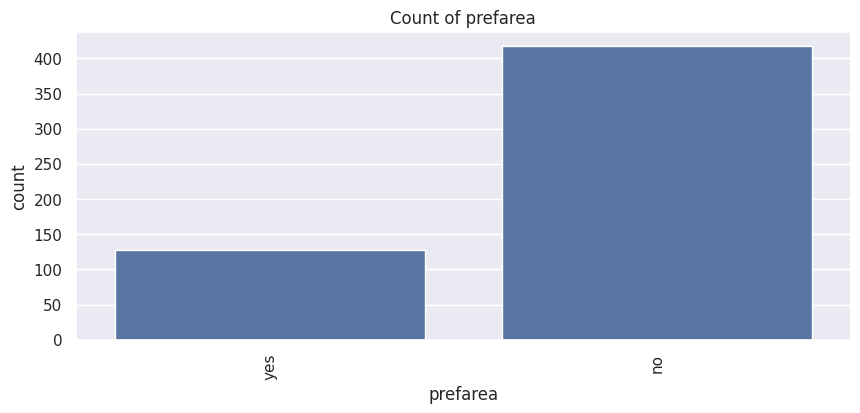

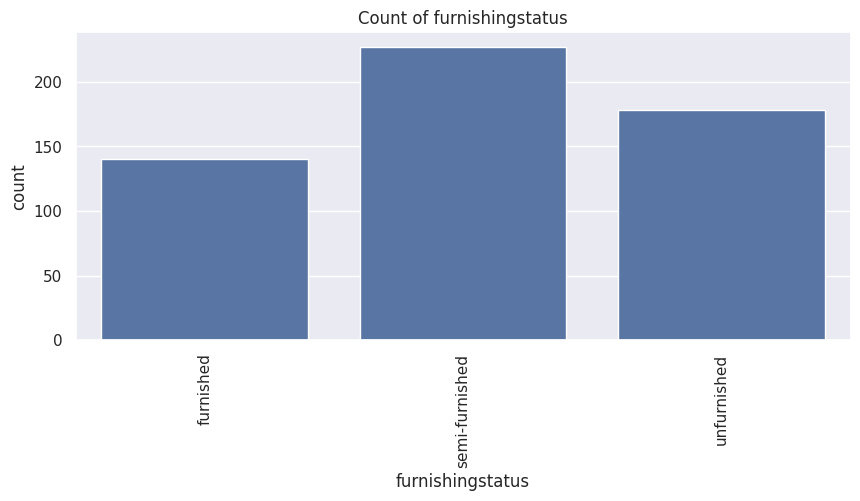

In [ ]:
# Check the distribution of categorical features
categorical_features = ['mainroad', 'guestroom', 'basement',	'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

<ipython-input-25-df6f0a2be154>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


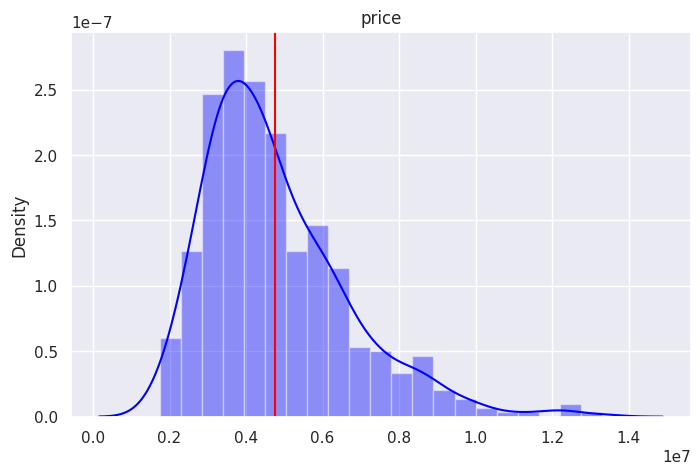

<ipython-input-25-df6f0a2be154>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


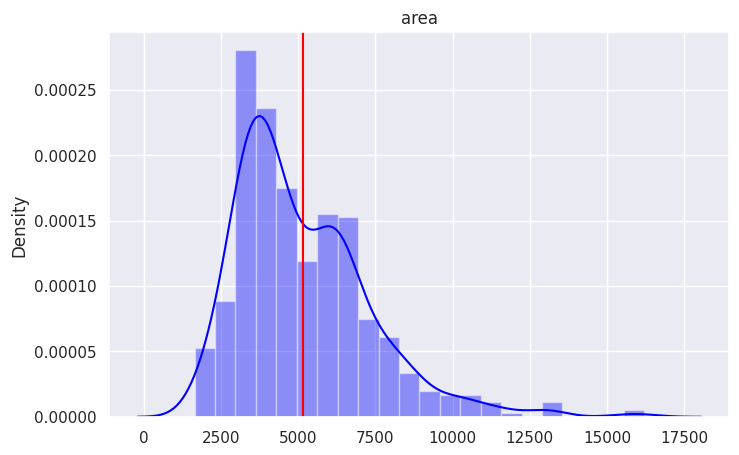

<ipython-input-25-df6f0a2be154>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


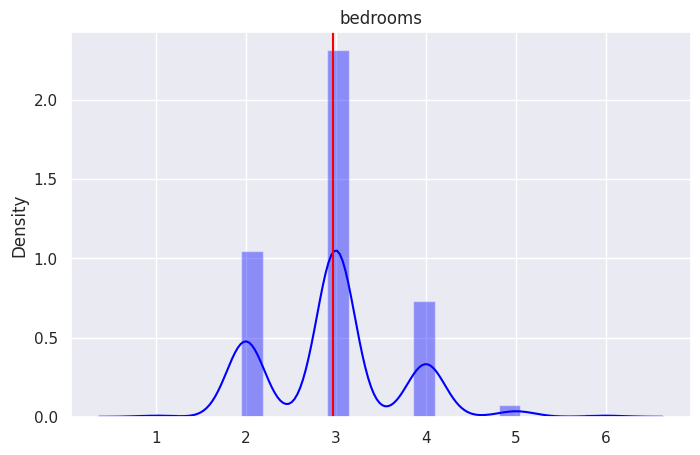

<ipython-input-25-df6f0a2be154>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


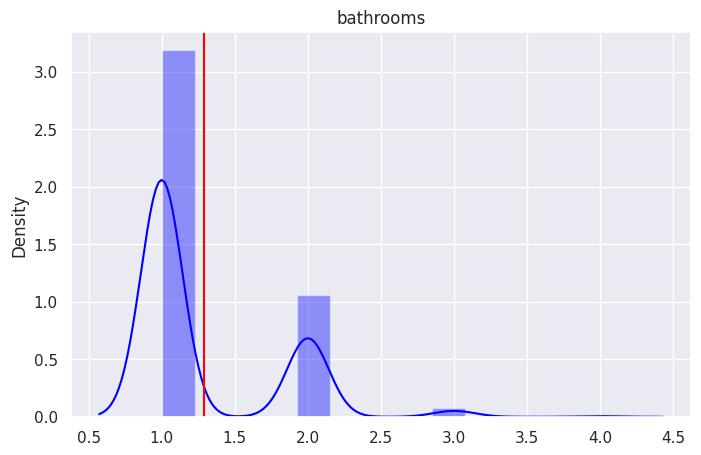

<ipython-input-25-df6f0a2be154>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


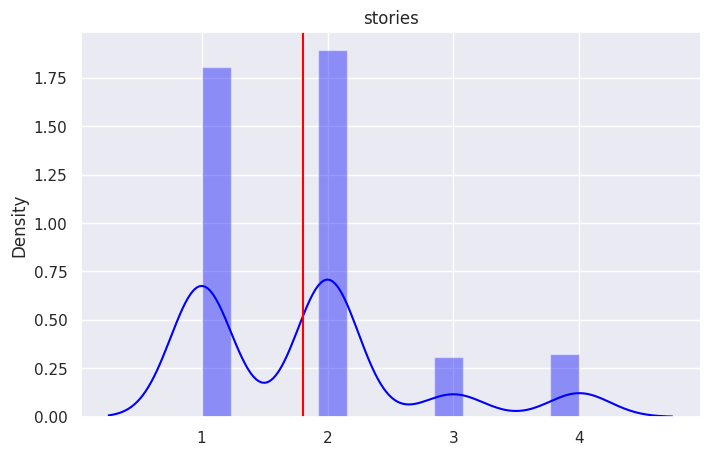

<ipython-input-25-df6f0a2be154>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


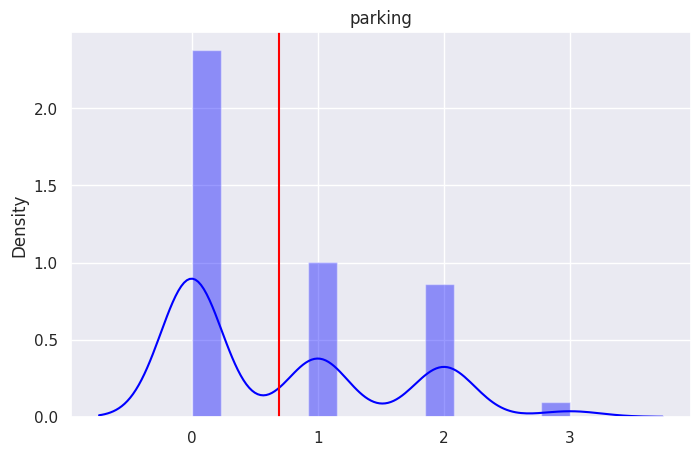

In [ ]:
# Example 8 - Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = data.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

###4.5Investigating the distribution and outliers with Box plots

The meadian is:  4340000.0


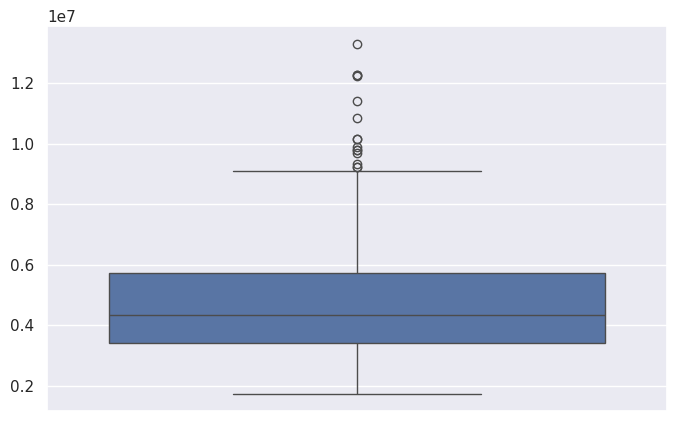

In [ ]:
# Example 9 - Investigating the distribution of Price

x = data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', data['price'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

The meadian is:  4340000.0


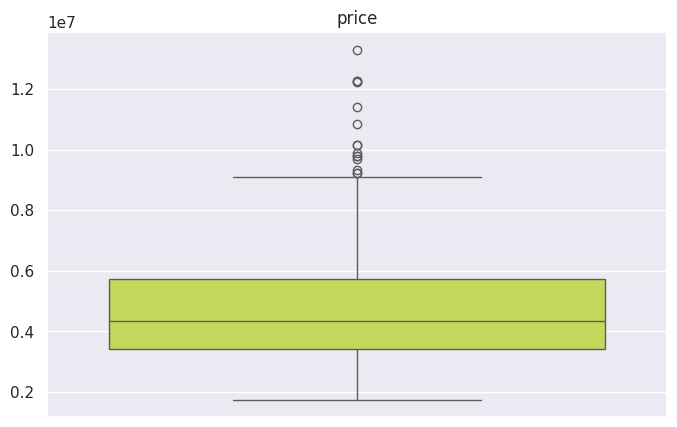

The meadian is:  4600.0


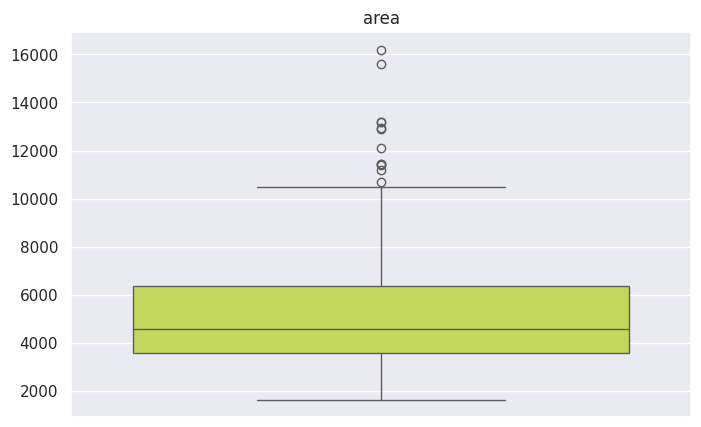

The meadian is:  3.0


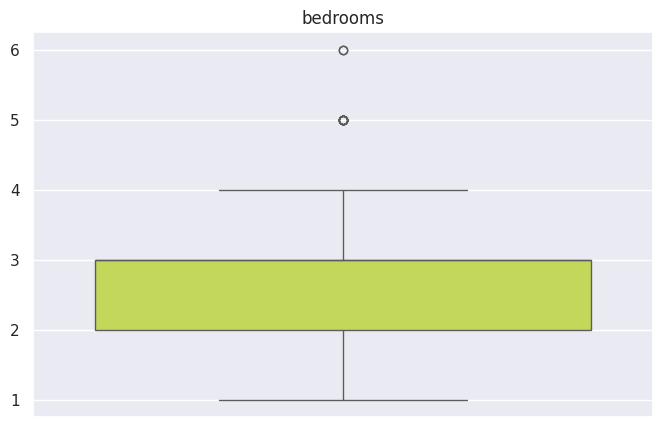

The meadian is:  1.0


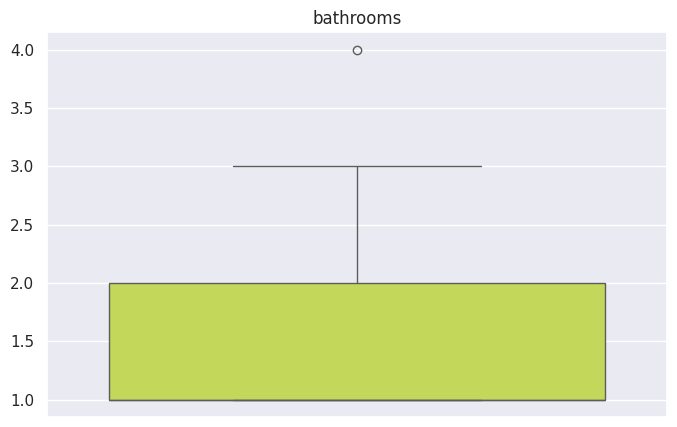

The meadian is:  2.0


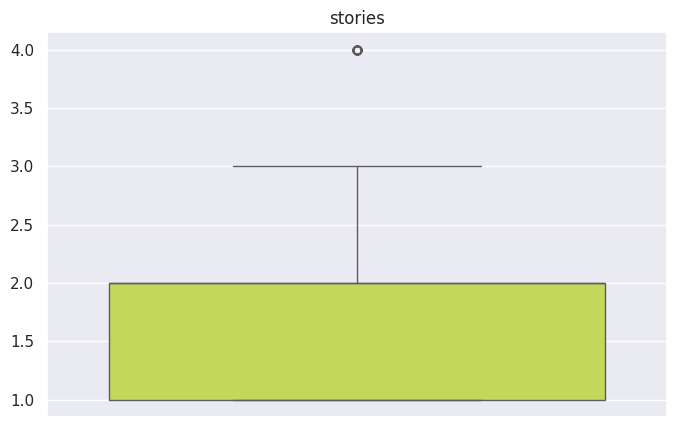

The meadian is:  0.0


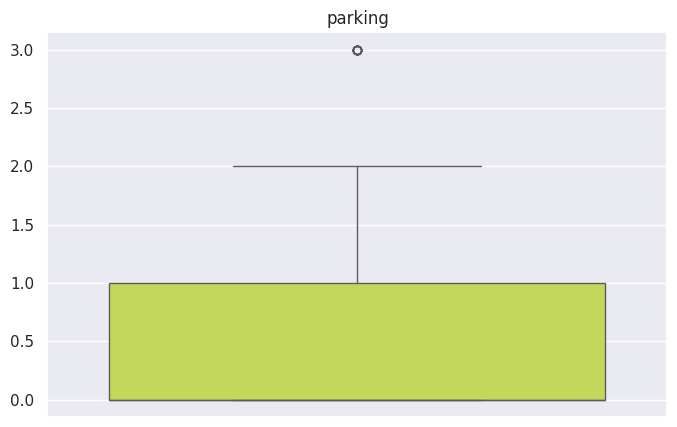

In [ ]:
# Example 10 - Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:
    x = data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', data[c].median())
    plt.title(c)
    plt.show()

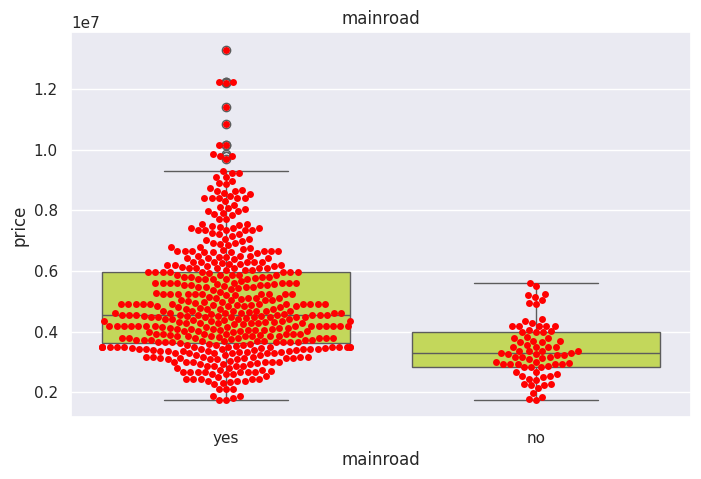

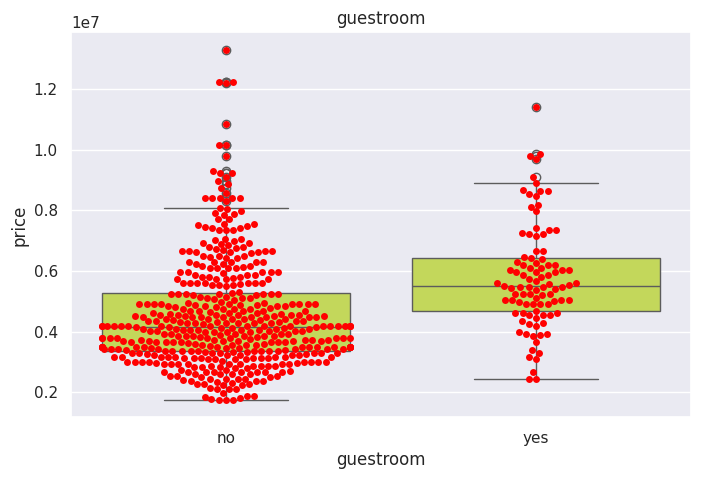

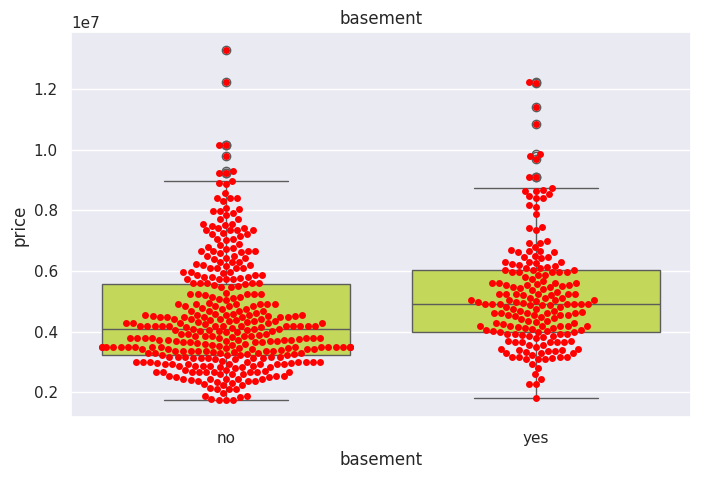

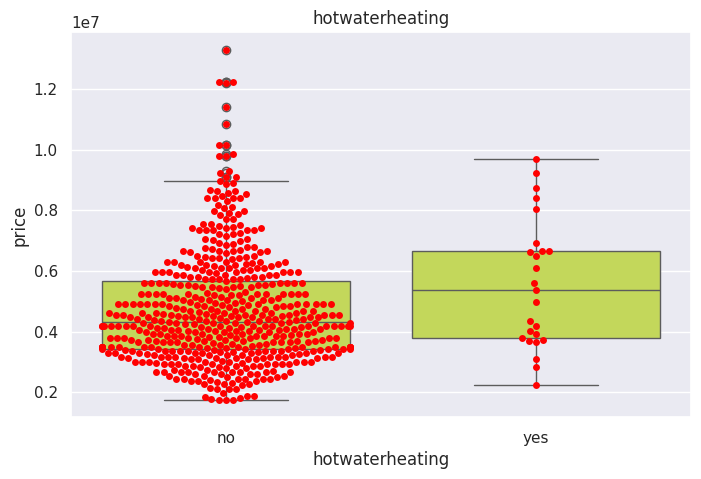

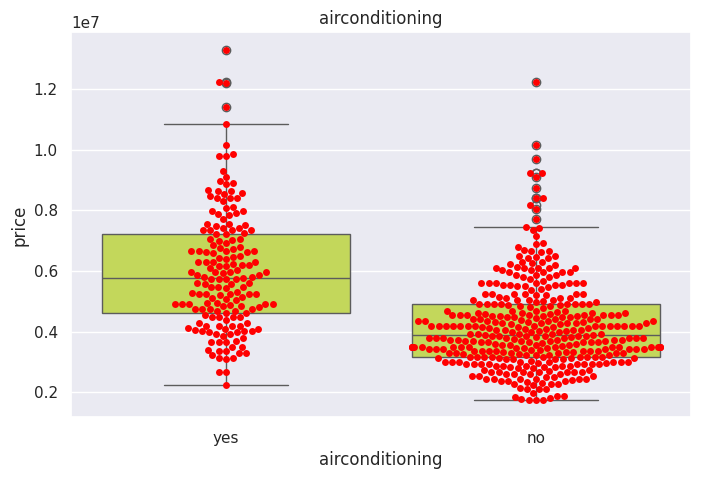

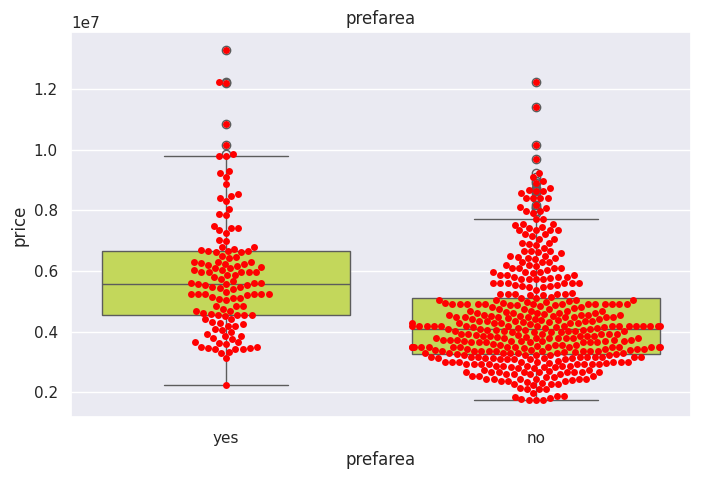

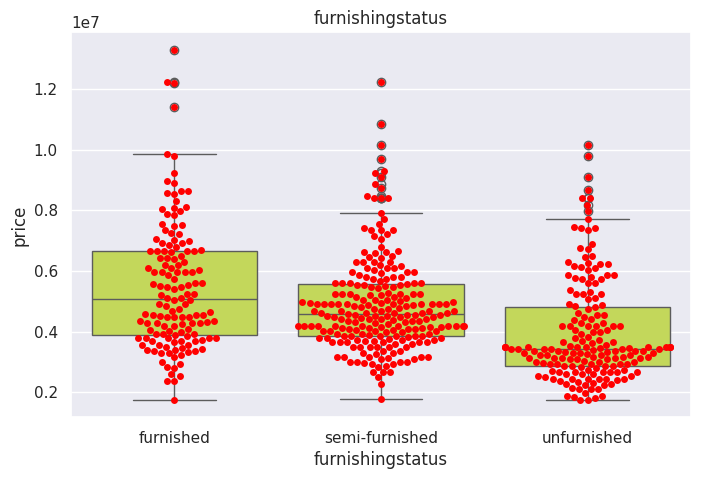

In [ ]:
# Example 11 - Investigating the distribution of price by categorical variables - by data points

categories = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=data, color="red")
    plt.title(c)
    plt.show()

###4. Converting the categorical values into numerical representation

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
# Making categorical variables into numeric representation

new_data = pd.get_dummies(data, columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
new_data.head()

price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   
2             1             1              0            0             1   
3             1             1              0            0             1   
4             1             0              1            0             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0                   0   
1                   1                    0                   0   
2                   1                    0                   1   
3                   1                    0                   0   
4                   1                    0                   0   

   airconditioning_yes  prefarea_no  prefarea_yes  furnishingstatus_furnished  \
0                    1            0             1                           1   
1                    1            1             0                           1   
2                    0            0             1                           0   
3                    1            0             1                           1   
4                    1            1             0                           1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                                0                             0  
2                                1                             0  
3                                0                             0  
4                                0                             0

In [ ]:
new_data.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_no                        uint8
mainroad_yes                       uint8
guestroom_no                       uint8
guestroom_yes                      uint8
basement_no                        uint8
basement_yes                       uint8
hotwaterheating_no                 uint8
hotwaterheating_yes                uint8
airconditioning_no                 uint8
airconditioning_yes                uint8
prefarea_no                        uint8
prefarea_yes                       uint8
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

In [ ]:
new_data.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_no                        uint8
mainroad_yes                       uint8
guestroom_no                       uint8
guestroom_yes                      uint8
basement_no                        uint8
basement_yes                       uint8
hotwaterheating_no                 uint8
hotwaterheating_yes                uint8
airconditioning_no                 uint8
airconditioning_yes                uint8
prefarea_no                        uint8
prefarea_yes                       uint8
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

### 4.6  Selecting the important features

In [ ]:
new_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
new_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

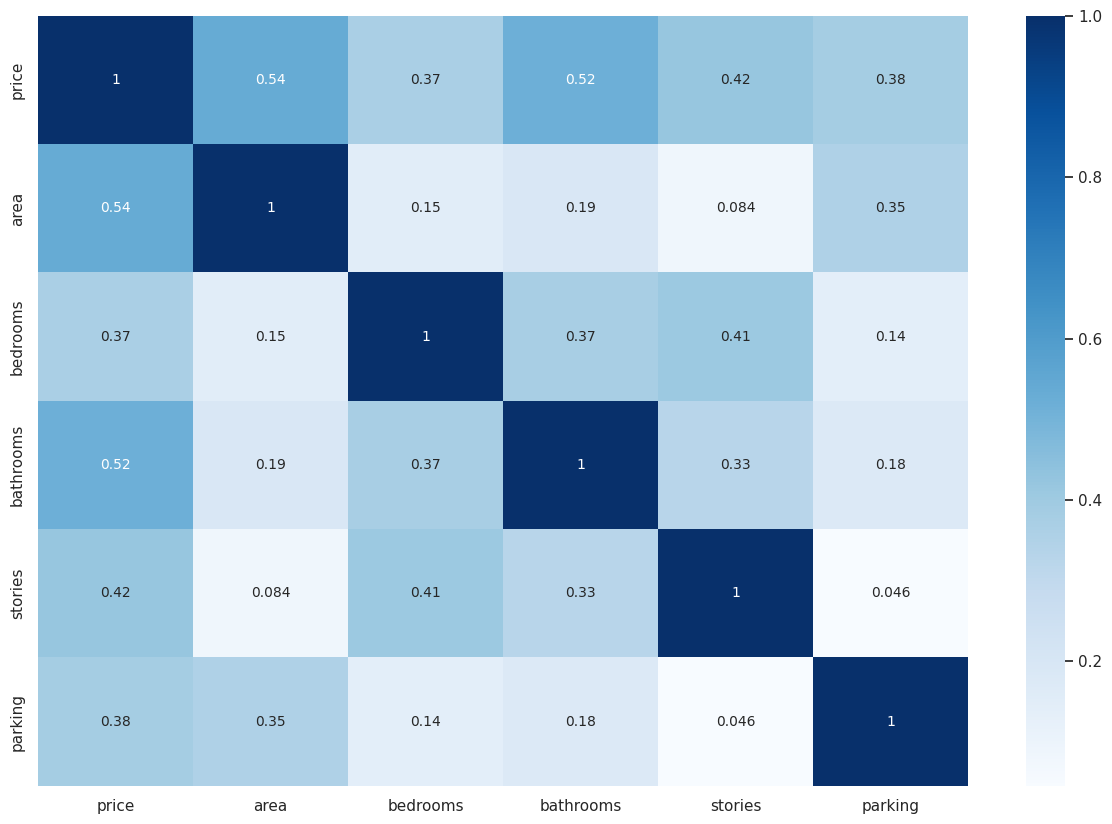

In [ ]:
# Example 12 - Heatmap

# droping columns we don't need
#del new_raw_data['car_ID']
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

pc = new_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [ ]:
df = pd.DataFrame(new_data)

# Specify the columns you want to select
selected_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create a new DataFrame with specific columns
new_data = df[selected_columns]

print(new_data)

        price  area  bedrooms  bathrooms  stories  parking
0    13300000  7420         4          2        3        2
1    12250000  8960         4          4        4        3
2    12250000  9960         3          2        2        2
3    12215000  7500         4          2        2        3
4    11410000  7420         4          1        2        2
..        ...   ...       ...        ...      ...      ...
540   1820000  3000         2          1        1        2
541   1767150  2400         3          1        1        0
542   1750000  3620         2          1        1        0
543   1750000  2910         3          1        1        0
544   1750000  3850         3          1        2        0

[545 rows x 6 columns]


### Heatmap
First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
.corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease

In [ ]:
new_data.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_no                        uint8
mainroad_yes                       uint8
guestroom_no                       uint8
guestroom_yes                      uint8
basement_no                        uint8
basement_yes                       uint8
hotwaterheating_no                 uint8
hotwaterheating_yes                uint8
airconditioning_no                 uint8
airconditioning_yes                uint8
prefarea_no                        uint8
prefarea_yes                       uint8
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

###Feature Importance
Steps of Running Feature Importance

Split the data into X & y

Run a Tree-based estimators (i.e. decision trees & random forests)

Run Feature Importance

We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

In [ ]:
# Split the data into X & y

X = new_data.drop(['price'], axis = 1).values
X_columns = new_data.drop(['price'], axis = 1)
y = new_data['price'].astype(int)

print(X.shape)
print(y.shape)

(545, 20)
(545,)


In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [ ]:
dt.feature_importances_

array([0.403844, 0.056943, 0.045367, 0.081586, 0.085578, 0.016248,
       0.010191, 0.004916, 0.025604, 0.074558, 0.002975, 0.004110,
       0.003139, 0.016203, 0.019081, 0.018980, 0.016508, 0.025057,
       0.061244, 0.027868])

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None,
    feature_names=new_data.drop('price', axis=1).columns,
    class_names=new_data['price'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature area:, 0.404
Importance of feature bedrooms:, 0.057
Importance of feature bathrooms:, 0.045
Importance of feature stories:, 0.082
Importance of feature parking:, 0.086
Importance of feature mainroad_no:, 0.016
Importance of feature mainroad_yes:, 0.010
Importance of feature guestroom_no:, 0.005
Importance of feature guestroom_yes:, 0.026
Importance of feature basement_no:, 0.075
Importance of feature basement_yes:, 0.003
Importance of feature hotwaterheating_no:, 0.004
Importance of feature hotwaterheating_yes:, 0.003
Importance of feature airconditioning_no:, 0.016
Importance of feature airconditioning_yes:, 0.019
Importance of feature prefarea_no:, 0.019
Importance of feature prefarea_yes:, 0.017
Importance of feature furnishingstatus_furnished:, 0.025
Importance of feature furnishingstatus_semi-furnished:, 0.061
Importance of feature furnishingstatus_unfurnished:, 0.028


index                         Variable  Feature Importance Score
0       0                             area                  0.403844
1       4                          parking                  0.085578
2       3                          stories                  0.081586
3       9                      basement_no                  0.074558
4      18  furnishingstatus_semi-furnished                  0.061244
5       1                         bedrooms                  0.056943
6       2                        bathrooms                  0.045367
7      19     furnishingstatus_unfurnished                  0.027868
8       8                    guestroom_yes                  0.025604
9      17       furnishingstatus_furnished                  0.025057
10     14              airconditioning_yes                  0.019081
11     15                      prefarea_no                  0.018980
12     16                     prefarea_yes                  0.016508
13      5                      mainroad_no                  0.016248
14     13               airconditioning_no                  0.016203
15      6                     mainroad_yes                  0.010191
16      7                     guestroom_no                  0.004916
17     11               hotwaterheating_no                  0.004110
18     12              hotwaterheating_yes                  0.003139
19     10                     basement_yes                  0.002975

###5. Splitting the Raw Data - Hold-out validation

In [ ]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 20)
(109, 20)
(436,)
(109,)


###6. Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [ ]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', rf.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', rf.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,rf.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,rf.predict(X_test)))


# print("")
# # Coefficients
# print('Coefficients: ', lr.coef_ )

The Accuracy  on the training dataset is:  0.9462194559972211
The Accuracy r2  on the training dataset prediction is:  0.9497767009832233

The Accuracy  on the testing dataset is:  0.6182612823435749

The RMSE  on the training dataset is:  414147.39471158595
The RMSE  on the testing dataset is:  1202837.337593178

The MAE  on the training dataset is:  301297.80459989805
The MAE  on the testing dataset is:  785762.2446483179


<ipython-input-145-c98880aaaad6>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

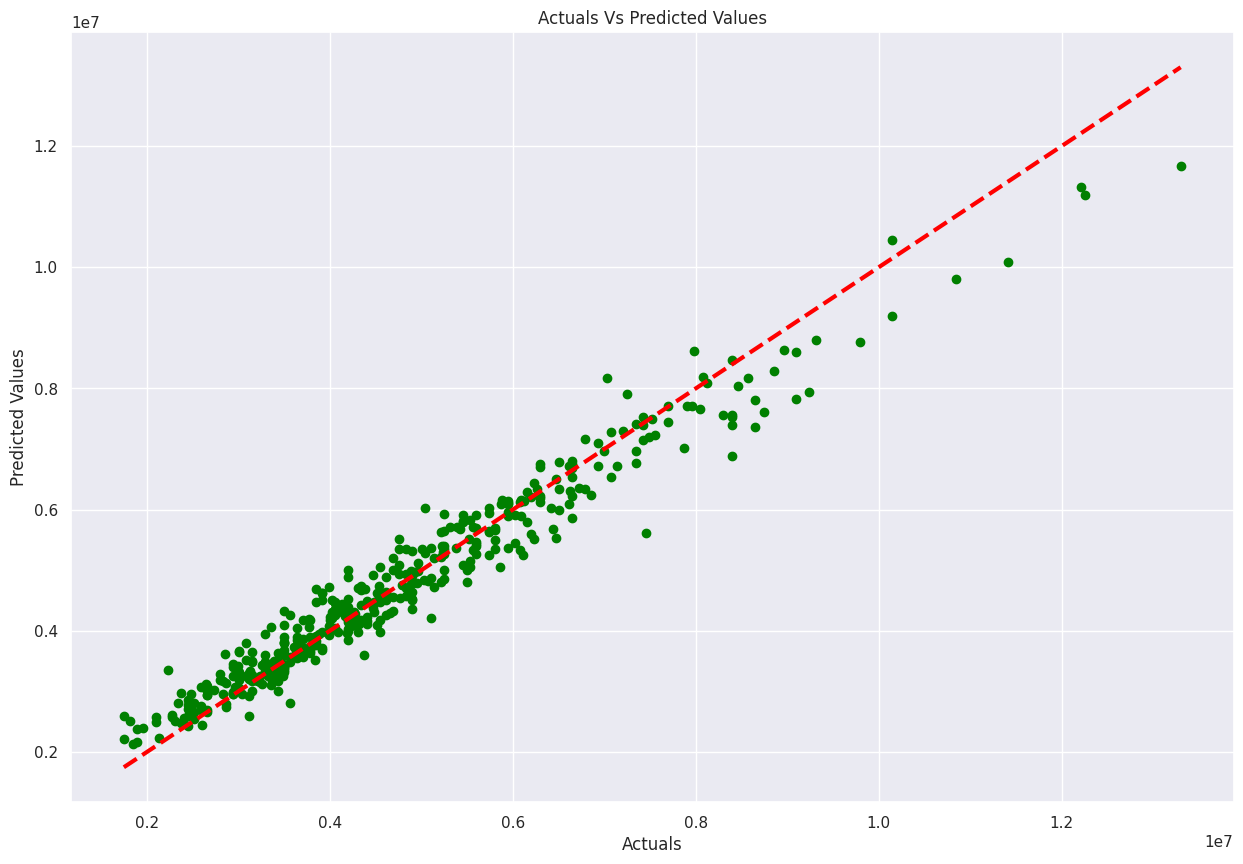

In [ ]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

In [ ]:
data.head(2)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished

In [ ]:
new_data.head(2)

price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0                   0   
1                   1                    0                   0   

   airconditioning_yes  prefarea_no  prefarea_yes  furnishingstatus_furnished  \
0                    1            0             1                           1   
1                    1            1             0                           1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                                0                             0

In [ ]:
 df['new'] = range(1, len(df.index)+1)

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   
2             1             1              0            0             1   
3             1             1              0            0             1   
4             1             0              1            0             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0                   0   
1                   1                    0                   0   
2                   1                    0                   1   
3                   1                    0                   0   
4                   1                    0                   0   

   airconditioning_yes  prefarea_no  prefarea_yes  furnishingstatus_furnished  \
0                    1            0             1                           1   
1                    1            1             0                           1   
2                    0            0             1                           0   
3                    1            0             1                           1   
4                    1            1             0                           1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  new  
0                                0                             0    1  
1                                0                             0    2  
2                                1                             0    3  
3                                0                             0    4  
4                                0                             0    5

In [ ]:
data['id'] = range(1, len(data.index)+1)

In [ ]:
data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  id  
0              no             yes        2      yes        furnished   1  
1              no             yes        3       no        furnished   2  
2              no              no        2      yes   semi-furnished   3  
3              no             yes        3      yes        furnished   4  
4              no             yes        2       no        furnished   5

In [ ]:
new_data['id'] = range(1, len(new_data.index)+1)

In [ ]:
new_data.head()

price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   
2             1             1              0            0             1   
3             1             1              0            0             1   
4             1             0              1            0             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0                   0   
1                   1                    0                   0   
2                   1                    0                   1   
3                   1                    0                   0   
4                   1                    0                   0   

   airconditioning_yes  prefarea_no  prefarea_yes  furnishingstatus_furnished  \
0                    1            0             1                           1   
1                    1            1             0                           1   
2                    0            0             1                           0   
3                    1            0             1                           1   
4                    1            1             0                           1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  id  
0                                0                             0   1  
1                                0                             0   2  
2                                1                             0   3  
3                                0                             0   4  
4                                0                             0   5

In [ ]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
id                   int64
dtype: object

In [ ]:
new_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'id'],
      dtype='object')

In [ ]:
X_columns.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no',
       'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no',
       'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes',
       'airconditioning_no', 'airconditioning_yes', 'prefarea_no',
       'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
final_df.head(2)

area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  4600         4          1        2        0            0             1   
1  3900         3          1        2        0            0             1   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0             1              0            1             0                   1   
1             1              0            1             0                   1   

   hotwaterheating_yes  airconditioning_no  airconditioning_yes  prefarea_no  \
0                    0                   1                    0            1   
1                    0                   1                    0            1   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0             0                           0                                1   
1             0                           0                                0   

   furnishingstatus_unfurnished    Price          Phase  Price Predictions  
0                             0  3500000  Existing data       3.824858e+06  
1                             1  4375000  Existing data       3.608660e+06

In [ ]:
final_df2.head()

area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  6360         3          1        3        0            0             1   
1  3150         3          1        2        0            1             0   
2  5400         2          1        2        0            0             1   
3  4410         2          1        1        1            1             0   
4  5500         3          1        3        1            0             1   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0             1              0            1             0                   1   
1             1              0            1             0                   1   
2             1              0            1             0                   1   
3             1              0            1             0                   1   
4             0              1            1             0                   1   

   hotwaterheating_yes  airconditioning_no  airconditioning_yes  prefarea_no  \
0                    0                   1                    0            0   
1                    0                   1                    0            1   
2                    0                   1                    0            0   
3                    0                   1                    0            1   
4                    0                   0                    1            1   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0             1                           0                                1   
1             0                           0                                0   
2             1                           0                                1   
3             0                           0                                0   
4             0                           1                                0   

   furnishingstatus_unfurnished    Price            Phase  Price Predictions  
0                             0  5600000  New unseen data       5.511215e+06  
1                             1  2940000  New unseen data       2.752772e+06  
2                             0  4690000  New unseen data       4.571295e+06  
3                             1  4200000  New unseen data       2.792057e+06  
4                             0  5873000  New unseen data       5.904251e+06

###Joining the data

In [ ]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
final_df['id'] = range(1, len(final_df.index)+1)
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = lr.predict(X_test)
final_df2['id'] = range(1, len(final_df2.index)+1)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions
data['id'] = data['id'].astype(int)
final_df3['id'] = final_df3['id'].astype(int)



(436, 24)
(109, 24)
(545, 24)


In [ ]:
final_df.head(2)

area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  4600         4          1        2        0            0             1   
1  3900         3          1        2        0            0             1   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0             1              0            1             0                   1   
1             1              0            1             0                   1   

   hotwaterheating_yes  airconditioning_no  airconditioning_yes  prefarea_no  \
0                    0                   1                    0            1   
1                    0                   1                    0            1   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0             0                           0                                1   
1             0                           0                                0   

   furnishingstatus_unfurnished    Price          Phase  Price Predictions  id  
0                             0  3500000  Existing data       3.824858e+06   1  
1                             1  4375000  Existing data       3.608660e+06   2

In [ ]:
final_df2.head(2)

area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  6360         3          1        3        0            0             1   
1  3150         3          1        2        0            1             0   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0             1              0            1             0                   1   
1             1              0            1             0                   1   

   hotwaterheating_yes  airconditioning_no  airconditioning_yes  prefarea_no  \
0                    0                   1                    0            0   
1                    0                   1                    0            1   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0             1                           0                                1   
1             0                           0                                0   

   furnishingstatus_unfurnished    Price            Phase  Price Predictions  \
0                             0  5600000  New unseen data          5623240.0   
1                             1  2940000  New unseen data          2836680.0   

   id  
0   1  
1   2

In [ ]:
final_df3.head(2)

area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  4600         4          1        2        0            0             1   
1  3900         3          1        2        0            0             1   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0             1              0            1             0                   1   
1             1              0            1             0                   1   

   hotwaterheating_yes  airconditioning_no  airconditioning_yes  prefarea_no  \
0                    0                   1                    0            1   
1                    0                   1                    0            1   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0             0                           0                                1   
1             0                           0                                0   

   furnishingstatus_unfurnished    Price          Phase  Price Predictions  id  
0                             0  3500000  Existing data       3.824858e+06   1  
1                             1  4375000  Existing data       3.608660e+06   2

In [ ]:
data.head(2)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  id  
0              no             yes        2      yes        furnished   1  
1              no             yes        3       no        furnished   2

In [ ]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
final_df['id'] = range(1, len(final_df.index)+1)
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = lr.predict(X_test)
final_df2['id'] = range(1, len(final_df2.index)+1)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions
data['id'] = data['id'].astype(int)
final_df3['id'] = final_df3['id'].astype(int)



(436, 24)
(109, 24)
(545, 24)


In [ ]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
final_df['id'] = range(1, len(final_df.index)+1)
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = lr.predict(X_test)
final_df2['id'] = range(1, len(final_df2.index)+1)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions
data['id'] = data['id'].astype(int)
final_df3['id'] = final_df3['id'].astype(int)

final_df4 = data.merge(final_df3[['id','Phase','Price Predictions']], how = 'left', on = 'id')
#final_df4['area'] = final_df4['area'] + ' - ' + final_df4['id'].astype(str)
print(final_df4.shape)
final_df4.head()

(436, 24)
(109, 24)
(545, 24)
(654, 16)


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  13300000  7420         4          2        3      yes        no       no   
2  12250000  8960         4          4        4      yes        no       no   
3  12250000  8960         4          4        4      yes        no       no   
4  12250000  9960         3          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  id  \
0              no             yes        2      yes        furnished   1   
1              no             yes        2      yes        furnished   1   
2              no             yes        3       no        furnished   2   
3              no             yes        3       no        furnished   2   
4              no              no        2      yes   semi-furnished   3   

             Phase  Price Predictions  
0    Existing data       3.824858e+06  
1  New unseen data       5.623240e+06  
2    Existing data       3.608660e+06  
3  New unseen data       2.836680e+06  
4    Existing data       5.796117e+06

In [ ]:
data.shape

(545, 14)

In [ ]:
final_df4.shape

(654, 16)

In [ ]:
final_df4.isnull().sum()

price                  0
area                   0
bedrooms               0
bathrooms              0
stories                0
mainroad               0
guestroom              0
basement               0
hotwaterheating        0
airconditioning        0
parking                0
prefarea               0
furnishingstatus       0
id                     0
Phase                109
Price Predictions    109
dtype: int64

###Exporting data in CSV

In [ ]:
# 9.5. Exporting the data in a CSV
final_df4.to_csv('House Price Predictions Output', sep='\t')

os. getcwd()

'/content'